## Welcome to my Jupyter Notebook Python Code on Analysing UK Smoking Data

In [412]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotnine
from plotnine import *
import statsmodels.api as sma
from sklearn import *

In [359]:
#Loading the Dataset in
Smoking_Dataset = pd.read_excel('11263-Smoking_tcm86-13253.xls', 0)

In [360]:
#Initial glance at the dataset
print(Smoking_Dataset)

         Sex  Age Marital Status Highest Qualification  Nationality Ethnicity  \
0       Male   38       Divorced       No Qualification     British     White   
1     Female   42         Single       No Qualification     British     White   
2       Male   40        Married                 Degree     English     White   
3     Female   40        Married                 Degree     English     White   
4     Female   39        Married           GCSE/O Level     British     White   
...      ...  ...            ...                    ...         ...       ...   
1688    Male   22         Single       No Qualification    Scottish     White   
1689  Female   49       Divorced       Other/Sub Degree     English     White   
1690    Male   45        Married       Other/Sub Degree    Scottish     White   
1691  Female   51        Married       No Qualification     English     White   
1692    Male   31        Married                 Degree    Scottish     White   

                    Gross I

In [361]:
#Checking to see the format and exact wording of column names
Smoking_Dataset.columns

Index(['Sex', 'Age', 'Marital Status', 'Highest Qualification ', 'Nationality',
       'Ethnicity', 'Gross Income', 'Region', 'Smoke?', 'Amount Weekends',
       'Amount Weekdays', 'Type'],
      dtype='object')

Section 1: Descriptive Statistics

In [362]:
#Checking for missing values
Smoking_Dataset.isna().sum()

Sex                          0
Age                          0
Marital Status               0
Highest Qualification        0
Nationality                  0
Ethnicity                    0
Gross Income                 0
Region                       0
Smoke?                       0
Amount Weekends           1270
Amount Weekdays           1270
Type                      1270
dtype: int64

In [363]:
#Summary statistics of dataset
Smoking_Dataset.describe()

,Age,Amount Weekends,Amount Weekdays
count,1693.000000,423.000000,423.000000
mean,49.822209,18.787234,16.092199
std,18.730222,48.747119,48.763998
min,16.000000,0.000000,0.000000
25%,34.000000,10.000000,7.000000
50%,48.000000,15.000000,12.000000
75%,65.000000,20.000000,20.000000
max,97.000000,998.000000,998.000000


In [364]:
#Replacing Missing Values with '0' to maintain population size
Smoking_Dataset['Amount Weekdays'] = Smoking_Dataset['Amount Weekdays'].replace(np.nan, 0)

In [365]:
#Replacing Missing Values with '0' to maintain population size
Smoking_Dataset['Amount Weekends'] = Smoking_Dataset['Amount Weekends'].replace(np.nan, 0)

In [366]:
#Replacing Missing Values with 'None' to maintain population size
Smoking_Dataset['Type'] = Smoking_Dataset['Type'].replace(np.nan, 'None')

In [367]:
#Examining outlier values (above 75th percentile)
x = (Smoking_Dataset['Amount Weekdays'] > 20).sum()
y = (Smoking_Dataset['Amount Weekends'] > 20).sum()
print(x, y)

52 79


In [368]:
#Producing a Dataframe based only on smokers
Smokers_Only_Df = Smoking_Dataset[Smoking_Dataset['Smoke?'] == 'Yes']

In [369]:
#initial descriptive statistics
Smokers_Only_Df.describe()

,Age,Amount Weekends,Amount Weekdays
count,423.000000,423.000000,423.000000
mean,42.692671,18.787234,16.092199
std,16.144640,48.747119,48.763998
min,16.000000,0.000000,0.000000
25%,30.000000,10.000000,7.000000
50%,40.000000,15.000000,12.000000
75%,54.000000,20.000000,20.000000
max,93.000000,998.000000,998.000000


c:\Users\harve\anaconda3\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_boxplot : Removed 1 rows containing non-finite values.
c:\Users\harve\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_text : Removed 1 rows containing missing values.


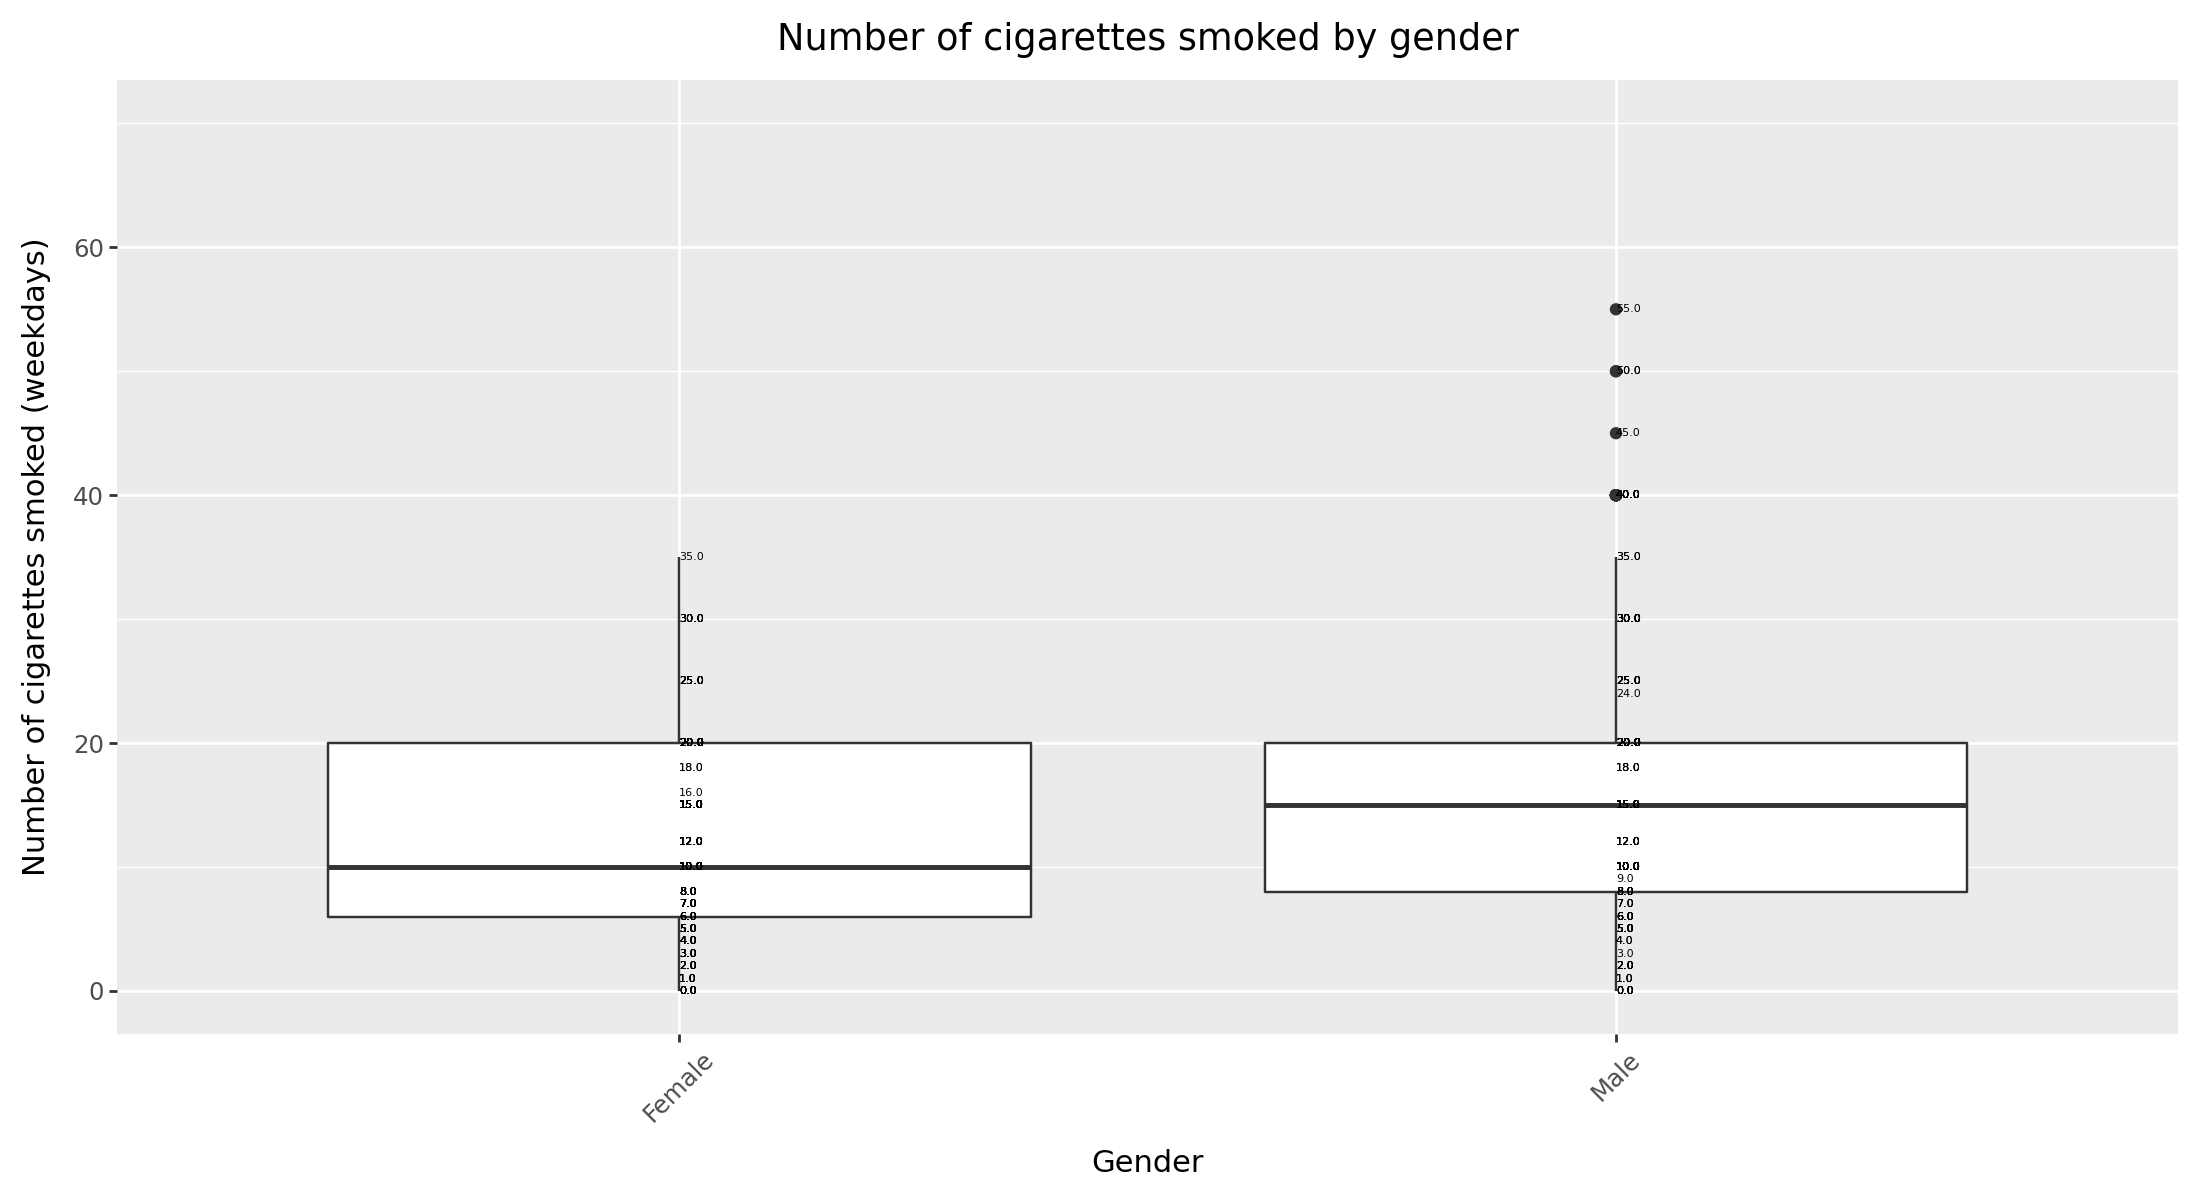

In [370]:
#Understanding how the outlier variables may be skewing the data
Smoking_Boxplot = ggplot(data = Smokers_Only_Df, mapping = aes(x = 'Sex', y = 'Amount Weekdays')) + geom_boxplot()+ labs(y ="Number of cigarettes smoked (weekdays)", x="Gender", title="Number of cigarettes smoked by gender") + scale_y_continuous(limits = (0,70)) + theme(figure_size=(11, 6), axis_text_x=element_text(rotation=45)) + geom_text(aes(label='Amount Weekdays'), position='identity', size=4, color='black', ha='left')
Smoking_Boxplot

In [371]:
#totalling how many outlier values there may be
(Smokers_Only_Df['Amount Weekdays'] > 35).sum()

15

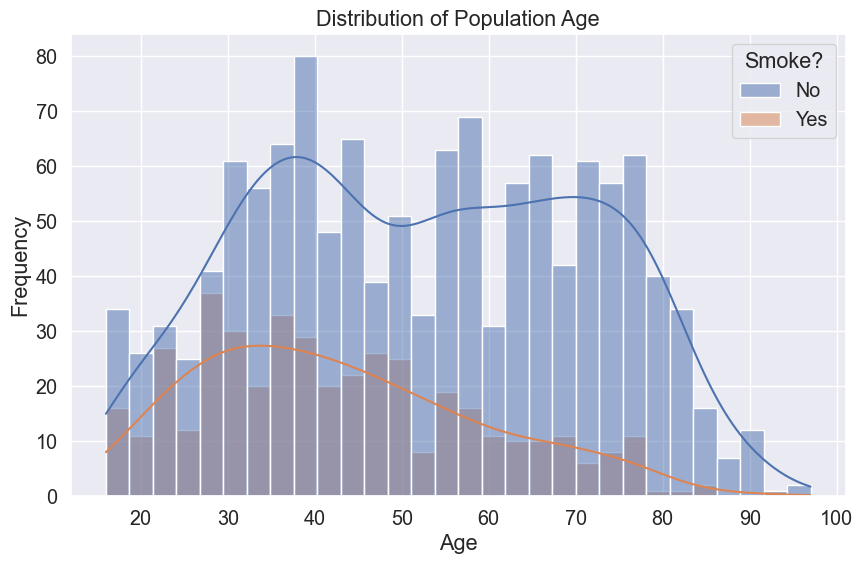

In [372]:
#viewing the distribution of the data. The main dataset contains all values for age so none are missing.
plt.figure(figsize=(10, 6))
sns.histplot(Smoking_Dataset,x = 'Age', bins=30, hue='Smoke?', kde = True)
sns.set(font_scale=1.3)
plt.title('Distribution of Population Age')
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.show()

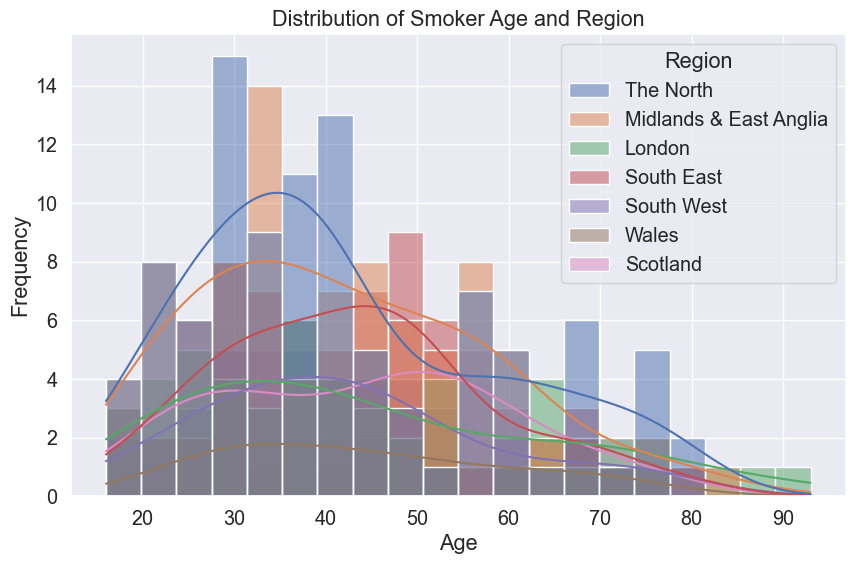

In [373]:
#Comparatively viewing the distribution of the data for the Smoker sample.
plt.figure(figsize=(10, 6))
sns.histplot(Smokers_Only_Df, x = 'Age', bins=20, hue='Region', kde = True)
sns.set(font_scale=1.3)
plt.title('Distribution of Smoker Age and Region')
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.show()

In [374]:
#Deciding to do regression with 'outliers' and without to examine difference. Sample size of smokers is otherwise small and these
#observation are still real instances despite being considerably larger.

In [375]:
#Creating a copy of the main cleaned dataset to encode categorical variables with numerical values instead of strings
Smoking_Dataset_encoded = Smoking_Dataset.copy()

In [376]:
#Turning gender strings into numerical values
Smoking_Dataset_encoded['Sex'] = Smoking_Dataset_encoded['Sex'].map({'Male': 0, 'Female': 1})
#Turning marital status into numerical values
Smoking_Dataset_encoded['Marital Status'] = Smoking_Dataset_encoded['Marital Status'].map({'Single': 0, 'Married': 1, 'Divorced': 2})
Smoking_Dataset_encoded['Marital Status'] = Smoking_Dataset_encoded['Marital Status'].replace(np.nan, 3)
#Turning Highest Qualification into numerical values
Smoking_Dataset_encoded['Highest Qualification '] = Smoking_Dataset_encoded['Highest Qualification '].map({'No Qualification': 0, 'GCSE/O Level': 1, 'GCSE/CSE': 2, 'Other/ Sub Degree': 3, 'Higher/Sub Degree': 4, 'ONC/BTEC': 5, 'A Levels': 6, 'Degree': 7})
#Turning Nationality into numerical values
Smoking_Dataset_encoded['Nationality'] = Smoking_Dataset_encoded['Nationality'].map({'English': 0, 'British': 1, 'Scottish': 2, 'Other': 3, 'Welsh': 4, 'Irish': 5, 'Refused': 6, 'Unknown': 6})
#Turning Ethnicity into numerical values
Smoking_Dataset_encoded['Ethnicity'] = Smoking_Dataset_encoded['Ethnicity'].map({'White': 0, 'Asian': 1, 'Black': 2, 'Chinese': 3, 'Mixed': 4, 'Refused': 5, 'Unknown': 5})
#Turning Gross Income into numerical values
Smoking_Dataset_encoded['Gross Income'] = Smoking_Dataset_encoded['Gross Income'].map({'Less than £2600': 0, '£2600 to less than £5200': 1, '£5200 to less than £10400': 2, '£10400 to less than £15600': 3, '£15600 to less than £20800': 4, '£20800 to less than £28600': 5, '£28600 to less than £36400': 6, '£36400 or more': 7, 'Refused' : 8, 'Unknown' :8})
#Turning Region into numerical values
Smoking_Dataset_encoded['Region'] = Smoking_Dataset_encoded['Region'].map({'Midlands & East Anglia': 0, 'The North': 1, 'South East': 2, 'London': 3, 'South West': 4, 'Scotland': 5, 'Wales': 6})
#Turning Smoke into numerical values
Smoking_Dataset_encoded['Smoke?'] = Smoking_Dataset_encoded['Smoke?'].map({'No': 0, 'Yes': 1})
#Replacing NA values in Highest Qualifcation
Smoking_Dataset_encoded['Highest Qualification '] = Smoking_Dataset_encoded['Highest Qualification '].replace(np.nan, 9)
#Turning Type into numerical values
Smoking_Dataset_encoded['Type'] = Smoking_Dataset_encoded['Type'].map({'None': 0, 'Packets': 1, 'Hand-Rolled': 2, 'Both/Mainly Packets': 3, 'Both/Mainly Hand-Rolled': 4})


In [377]:
#verifying column names for spelling, spaces, capitalisation
Smoking_Dataset_encoded.columns

Index(['Sex', 'Age', 'Marital Status', 'Highest Qualification ', 'Nationality',
       'Ethnicity', 'Gross Income', 'Region', 'Smoke?', 'Amount Weekends',
       'Amount Weekdays', 'Type'],
      dtype='object')

In [378]:
#x = Smoking_Dataset_encoded['Marital Status'].unique()
#y = Smoking_Dataset_encoded['Marital Status'].value_counts()
print(x, y)

52 79


In [379]:
#Preserving the entries of those who refused to give their education level
#Smoking_Dataset_encoded['Highest Qualification '] = Smoking_Dataset_encoded['Highest Qualification '].replace(np.nan, 9)

In [380]:
#viewing encoded dataset
Smoking_Dataset_encoded

,Sex,Age,Marital Status,Highest Qualification,Nationality,Ethnicity,Gross Income,Region,Smoke?,Amount Weekends,Amount Weekdays,Type
0,0,38,2.0,0.0,1,0,1,1,0,0.0,0.0,0
1,1,42,0.0,0.0,1,0,0,1,1,12.0,12.0,1
2,0,40,1.0,7.0,0,0,6,1,0,0.0,0.0,0
3,1,40,1.0,7.0,0,0,3,1,0,0.0,0.0,0
4,1,39,1.0,1.0,1,0,1,1,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1688,0,22,0.0,0.0,2,0,1,5,0,0.0,0.0,0
1689,1,49,2.0,9.0,0,0,1,5,1,20.0,20.0,2
1690,0,45,1.0,9.0,2,0,2,5,0,0.0,0.0,0
1691,1,51,1.0,0.0,0,0,1,5,1,20.0,20.0,1


In [381]:
#Checking to see all have been encoded properly
#Smoking_Dataset_encoded.isna().sum()

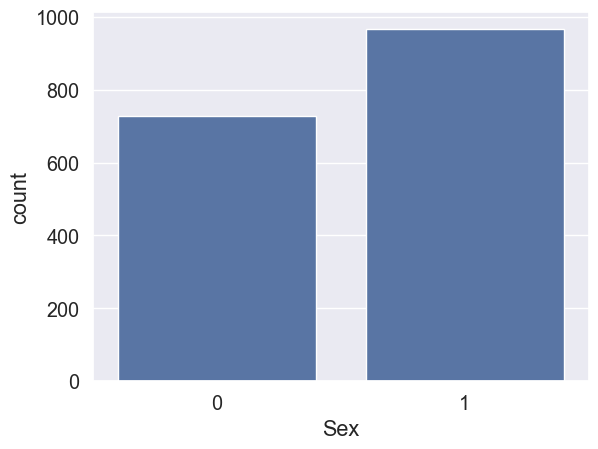

In [382]:
#Descriptive box plot
sns.countplot(x='Sex', data=Smoking_Dataset_encoded)
plt.show()

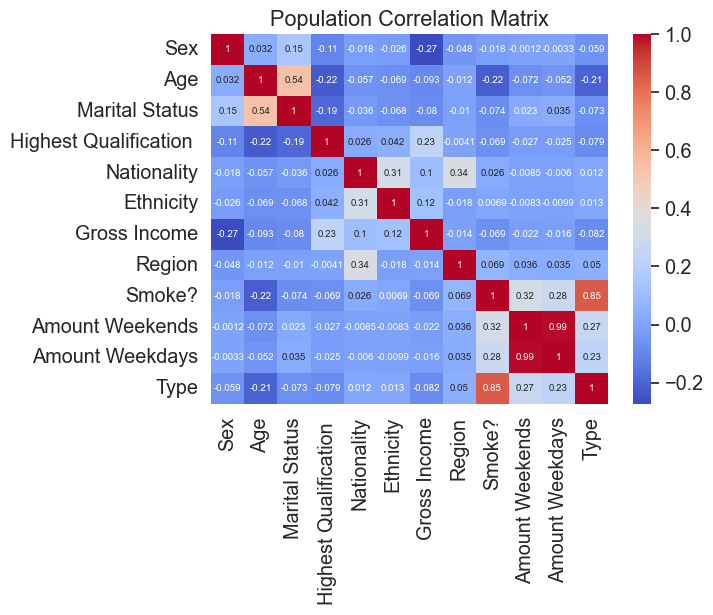

In [383]:
#checking for multicollinearity
corr_matrix = Smoking_Dataset_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 7})
plt.title('Population Correlation Matrix')
plt.show()

In [384]:
#Now performing Descriptive for Smokers only - need to encode

In [385]:
# Assuming Smokers_only_df is your original dataframe
Smokers_only_encoded = Smokers_Only_Df.copy()

# Turning gender strings into numerical values
Smokers_only_encoded['Sex'] = Smokers_only_encoded['Sex'].map({'Male': 0, 'Female': 1})

# Turning marital status into numerical values
Smokers_only_encoded['Marital Status'] = Smokers_only_encoded['Marital Status'].map({'Single': 0, 'Married': 1, 'Divorced': 2})
Smokers_only_encoded['Marital Status'] = Smokers_only_encoded['Marital Status'].replace(np.nan, 3)

# Turning Highest Qualification into numerical values
Smokers_only_encoded['Highest Qualification '] = Smokers_only_encoded['Highest Qualification '].map({
    'No Qualification': 0, 'GCSE/O Level': 1, 'GCSE/CSE': 2, 'Other/ Sub Degree': 3, 'Higher/Sub Degree': 4, 
    'ONC/BTEC': 5, 'A Levels': 6, 'Degree': 7
})

# Turning Nationality into numerical values
Smokers_only_encoded['Nationality'] = Smokers_only_encoded['Nationality'].map({
    'English': 0, 'British': 1, 'Scottish': 2, 'Other': 3, 'Welsh': 4, 'Irish': 5, 'Refused': 6, 'Unknown': 6
})

# Turning Ethnicity into numerical values
Smokers_only_encoded['Ethnicity'] = Smokers_only_encoded['Ethnicity'].map({
    'White': 0, 'Asian': 1, 'Black': 2, 'Chinese': 3, 'Mixed': 4, 'Refused': 5, 'Unknown': 5
})

# Turning Gross Income into numerical values
Smokers_only_encoded['Gross Income'] = Smokers_only_encoded['Gross Income'].map({
    'Less than £2600': 0, '£2600 to less than £5200': 1, '£5200 to less than £10400': 2, 
    '£10400 to less than £15600': 3, '£15600 to less than £20800': 4, '£20800 to less than £28600': 5, 
    '£28600 to less than £36400': 6, '£36400 or more': 7, 'Refused': 8, 'Unknown': 8
})

# Turning Region into numerical values
Smokers_only_encoded['Region'] = Smokers_only_encoded['Region'].map({
    'Midlands & East Anglia': 0, 'The North': 1, 'South East': 2, 'London': 3, 'South West': 4, 'Scotland': 5, 'Wales': 6
})

# Turning Smoke into numerical values
Smokers_only_encoded['Smoke?'] = Smokers_only_encoded['Smoke?'].map({'No': 0, 'Yes': 1})

# Replacing NA values in Highest Qualification
Smokers_only_encoded['Highest Qualification '] = Smokers_only_encoded['Highest Qualification '].replace(np.nan, 9)

# Turning Type into numerical values
Smokers_only_encoded['Type'] = Smokers_only_encoded['Type'].map({
    'None': 0, 'Packets': 1, 'Hand-Rolled': 2, 'Both/Mainly Packets': 3, 'Both/Mainly Hand-Rolled': 4
})

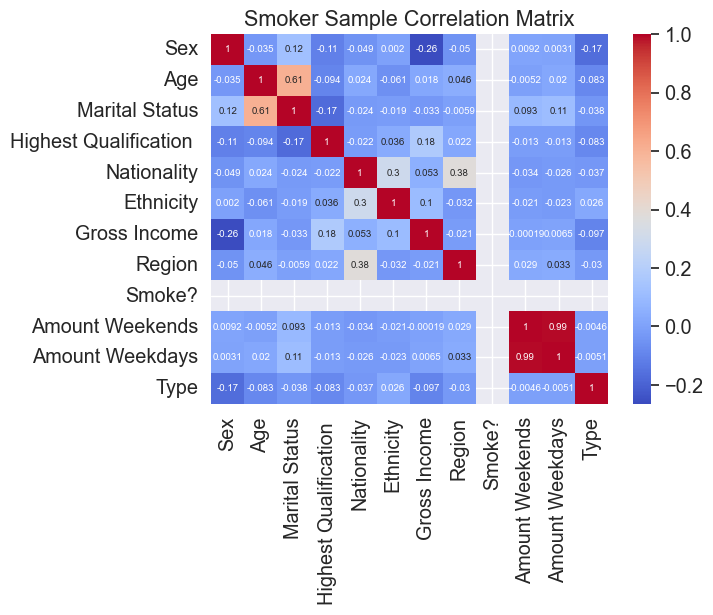

In [386]:
#second multicollinearity check
corr_matrix = Smokers_only_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 7})
plt.title('Smoker Sample Correlation Matrix')
plt.show()

In [387]:
#sub data frame for understanding what to analyse, expect, etc
group_by_region = Smoking_Dataset_encoded.groupby('Region').mean().round(2)[['Age', 'Gross Income', 'Amount Weekends', 'Amount Weekdays']]
print(group_by_region)

          Age  Gross Income  Amount Weekends  Amount Weekdays
Region                                                       
0       50.96          3.41             3.30             2.57
1       49.09          3.03             4.09             3.47
2       50.63          3.48             4.35             3.83
3       46.60          3.17             8.84             8.41
4       50.48          3.06             4.71             3.68
5       49.55          3.18             6.39             5.26
6       51.37          3.41             4.16             3.92


In [388]:
#comparison for smokers only
group_by_region = Smokers_only_encoded.groupby('Region').mean().round(2)[['Age', 'Gross Income', 'Amount Weekends', 'Amount Weekdays']]
print(group_by_region)

          Age  Gross Income  Amount Weekends  Amount Weekdays
Region                                                       
0       41.78          3.26            15.87            12.38
1       41.85          2.61            17.11            14.53
2       43.03          3.18            16.85            14.86
3       44.29          2.98            31.73            30.18
4       42.17          3.19            17.60            13.76
5       43.84          2.82            18.53            15.25
6       44.15          2.80            17.25            16.25


In [389]:
#verifying iniial findings + academia
smoke_by_gender = pd.crosstab(Smokers_Only_Df['Sex'], Smoking_Dataset_encoded['Smoke?'])
print(smoke_by_gender)

Smoke?    1
Sex        
Female  235
Male    188


In [390]:
#selecting numerical columns for pca and selecting components to view explainability
numerical_columns = Smokers_only_encoded.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Smokers_only_encoded[numerical_columns])
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
Smokers_only_encoded['PCA1'] = pca_result[:, 0]
Smokers_only_encoded['PCA2'] = pca_result[:, 1]

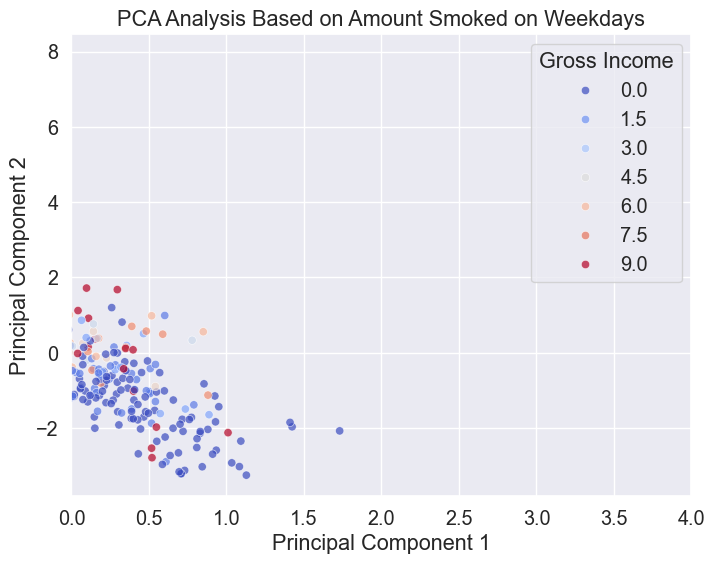

In [391]:
#plotting PCA 
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=Smokers_only_encoded, hue='Highest Qualification ', palette='coolwarm', alpha=0.7)
plt.title('PCA Analysis Based on Amount Smoked on Weekdays')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.xlim(0, 4)
plt.legend(title='Gross Income', loc='upper right')
plt.show()

In [392]:
#verifying explainability
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")
print(f"Total Variance Explained by First Two Components: {sum(explained_variance)}")

Explained Variance Ratio: [0.18543958 0.15201598]
Total Variance Explained by First Two Components: 0.3374555651082324


In [393]:
#viewing findings
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=numerical_columns)
print("Principal Component 1 loadings:")
print(loadings_df.iloc[0])  # Loadings for PC1
print("\nPrincipal Component 2 loadings:")
print(loadings_df.iloc[1])  # Loadings for PC2



Principal Component 1 loadings:
Sex                       5.500242e-02
Age                       1.677949e-01
Marital Status            2.519621e-01
Highest Qualification    -8.288953e-02
Nationality              -5.086681e-02
Ethnicity                -6.495288e-02
Gross Income             -3.576747e-02
Region                    2.622497e-02
Smoke?                   -3.469447e-18
Amount Weekends           6.647713e-01
Amount Weekdays           6.685524e-01
Type                     -2.841620e-02
Name: 0, dtype: float64

Principal Component 2 loadings:
Sex                      -0.231629
Age                      -0.570383
Marital Status           -0.589383
Highest Qualification     0.304941
Nationality               0.084462
Ethnicity                 0.139257
Gross Income              0.199408
Region                    0.044669
Smoke?                    0.000000
Amount Weekends           0.234374
Amount Weekdays           0.221824
Type                      0.090705
Name: 1, dtype: float64

In [394]:
#checking updated df
Smokers_only_encoded

,Sex,Age,Marital Status,Highest Qualification,Nationality,Ethnicity,Gross Income,Region,Smoke?,Amount Weekends,Amount Weekdays,Type,PCA1,PCA2
1,1,42,0.0,0.0,1,0,0,1,1,12.0,12.0,1,-0.223306,-0.304538
6,0,53,1.0,7.0,1,0,7,1,1,6.0,6.0,1,-0.460641,0.548313
8,0,40,0.0,2.0,0,0,1,1,1,8.0,8.0,2,-0.535764,0.550720
9,1,41,1.0,0.0,0,0,2,1,1,15.0,12.0,1,0.051396,-0.688141
20,1,34,1.0,2.0,1,0,1,1,1,6.0,12.0,1,-0.222034,-0.309052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1,31,0.0,1.0,2,0,4,5,1,20.0,10.0,1,-0.335058,0.761514
1682,0,24,0.0,0.0,2,0,0,5,1,15.0,15.0,2,-0.458504,1.105768
1685,0,35,1.0,0.0,2,0,3,5,1,3.0,12.0,1,-0.323901,0.253888
1689,1,49,2.0,9.0,0,0,1,5,1,20.0,20.0,2,0.336964,-0.424677


In [395]:
#regressing by total amount smoked

In [396]:
#changing analysis to total smoked rather than weekday/weekend 
Smokers_only_encoded['Amount Weekdays'] = Smokers_only_encoded['Amount Weekdays'] * 5
Smokers_only_encoded['Amount Weekends'] = Smokers_only_encoded['Amount Weekends'] * 2
Smokers_only_encoded['Smoked Weekly'] = Smokers_only_encoded['Amount Weekends'] + Smokers_only_encoded['Amount Weekdays']

In [397]:
#removing columns not being used in analysis
Smokers_only_encoded = Smokers_only_encoded.drop(['Amount Weekdays', 'Amount Weekends', 'PCA1', 'PCA2', 'Smoke?'], axis = 1)

In [398]:
#recasting the variable's data type for manipulation
Smokers_only_encoded['Smoked Weekly'] = Smokers_only_encoded['Smoked Weekly'].astype(int)

In [399]:
Smokers_only_encoded

,Sex,Age,Marital Status,Highest Qualification,Nationality,Ethnicity,Gross Income,Region,Type,Smoked Weekly
1,1,42,0.0,0.0,1,0,0,1,1,84
6,0,53,1.0,7.0,1,0,7,1,1,42
8,0,40,0.0,2.0,0,0,1,1,2,56
9,1,41,1.0,0.0,0,0,2,1,1,90
20,1,34,1.0,2.0,1,0,1,1,1,72
...,...,...,...,...,...,...,...,...,...,...
1676,1,31,0.0,1.0,2,0,4,5,1,90
1682,0,24,0.0,0.0,2,0,0,5,2,105
1685,0,35,1.0,0.0,2,0,3,5,1,66
1689,1,49,2.0,9.0,0,0,1,5,2,140


In [ ]:
#setting up first regression model
X = Smokers_only_encoded.drop(columns=['Smoked Weekly'])
y = Smokers_only_encoded['Smoked Weekly']
model = LinearRegression()
model.fit(X, y)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)
model = sm.OLS(y, X).fit()
print(model.summary())

                        Coefficient
Sex                      -10.472416
Age                       -1.831289
Marital Status            51.310210
Highest Qualification      0.087917
Nationality              -10.310112
Ethnicity                 -5.148048
Gross Income               1.792708
Region                     9.277336
Type                      -3.173570
                                 OLS Regression Results                                
Dep. Variable:          Smoked Weekly   R-squared (uncentered):                   0.118
Model:                            OLS   Adj. R-squared (uncentered):              0.099
Method:                 Least Squares   F-statistic:                              6.137
Date:                Wed, 11 Dec 2024   Prob (F-statistic):                    4.00e-08
Time:                        13:10:21   Log-Likelihood:                         -3063.8
No. Observations:                 423   AIC:                                      6146.
Df Residuals:           

In [ ]:
#setting up second regression model
X = Smoking_Dataset_encoded.drop(columns=['Smoke?'])
y = Smoking_Dataset_encoded['Smoke?']
model = LinearRegression()
model.fit(X, y)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                        Coefficient
Sex                        0.026824
Age                       -0.000942
Marital Status             0.003213
Highest Qualification     -0.001095
Nationality                0.004262
Ethnicity                 -0.005643
Gross Income               0.001891
Region                     0.005052
Amount Weekends            0.013763
Amount Weekdays           -0.012330
Type                       0.469412


In [ ]:
#understanding regional variation
group_by_region = Smokers_only_encoded.groupby('Region').mean().round(2)[['Age', 'Gross Income', 'Smoked Weekly', 'Highest Qualification ']]
print(group_by_region)

          Age  Gross Income  Smoked Weekly  Highest Qualification 
Region                                                            
0       41.78          3.26          93.64                    2.55
1       41.85          2.61         106.86                    1.96
2       43.03          3.18         108.00                    2.71
3       44.29          2.98         214.33                    4.25
4       42.17          3.19         104.00                    2.60
5       43.84          2.82         113.33                    2.49
6       44.15          2.80         115.75                    1.45


In [ ]:
#creating separate dfs for for each objective
Objective_1_Hypothesis = Smoking_Dataset_encoded.copy()

In [404]:
Objective_1_Hypothesis

,Sex,Age,Marital Status,Highest Qualification,Nationality,Ethnicity,Gross Income,Region,Smoke?,Amount Weekends,Amount Weekdays,Type
0,0,38,2.0,0.0,1,0,1,1,0,0.0,0.0,0
1,1,42,0.0,0.0,1,0,0,1,1,12.0,12.0,1
2,0,40,1.0,7.0,0,0,6,1,0,0.0,0.0,0
3,1,40,1.0,7.0,0,0,3,1,0,0.0,0.0,0
4,1,39,1.0,1.0,1,0,1,1,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1688,0,22,0.0,0.0,2,0,1,5,0,0.0,0.0,0
1689,1,49,2.0,9.0,0,0,1,5,1,20.0,20.0,2
1690,0,45,1.0,9.0,2,0,2,5,0,0.0,0.0,0
1691,1,51,1.0,0.0,0,0,1,5,1,20.0,20.0,1


In [405]:
Objective_1_Hypothesis = Objective_1_Hypothesis.drop(['Amount Weekends', 'Amount Weekdays', 'Type', 'Gross Income', 'Region'], axis = 1)

In [406]:
Objective_1_Hypothesis

,Sex,Age,Marital Status,Highest Qualification,Nationality,Ethnicity,Smoke?
0,0,38,2.0,0.0,1,0,0
1,1,42,0.0,0.0,1,0,1
2,0,40,1.0,7.0,0,0,0
3,1,40,1.0,7.0,0,0,0
4,1,39,1.0,1.0,1,0,0
...,...,...,...,...,...,...,...
1688,0,22,0.0,0.0,2,0,0
1689,1,49,2.0,9.0,0,0,1
1690,0,45,1.0,9.0,2,0,0
1691,1,51,1.0,0.0,0,0,1


In [ ]:
#second regression
X = Objective_1_Hypothesis.drop(columns=['Smoke?'])
y = Smoking_Dataset_encoded['Smoke?']
model = LinearRegression()
model.fit(X, y)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)
model = sm.OLS(y, X).fit()
print(model.summary())

                        Coefficient
Sex                       -0.026492
Age                       -0.006365
Marital Status             0.023688
Highest Qualification     -0.016942
Nationality                0.006202
Ethnicity                 -0.005503
                                 OLS Regression Results                                
Dep. Variable:                 Smoke?   R-squared (uncentered):                   0.188
Model:                            OLS   Adj. R-squared (uncentered):              0.185
Method:                 Least Squares   F-statistic:                              65.25
Date:                Wed, 11 Dec 2024   Prob (F-statistic):                    4.50e-73
Time:                        13:10:21   Log-Likelihood:                         -1051.6
No. Observations:                1693   AIC:                                      2115.
Df Residuals:                    1687   BIC:                                      2148.
Df Model:                           6       

In [408]:
Objective_3_Hypothesis = Smokers_only_encoded.copy()

In [409]:
Objective_3_Hypothesis

,Sex,Age,Marital Status,Highest Qualification,Nationality,Ethnicity,Gross Income,Region,Type,Smoked Weekly
1,1,42,0.0,0.0,1,0,0,1,1,84
6,0,53,1.0,7.0,1,0,7,1,1,42
8,0,40,0.0,2.0,0,0,1,1,2,56
9,1,41,1.0,0.0,0,0,2,1,1,90
20,1,34,1.0,2.0,1,0,1,1,1,72
...,...,...,...,...,...,...,...,...,...,...
1676,1,31,0.0,1.0,2,0,4,5,1,90
1682,0,24,0.0,0.0,2,0,0,5,2,105
1685,0,35,1.0,0.0,2,0,3,5,1,66
1689,1,49,2.0,9.0,0,0,1,5,2,140


In [ ]:
#third regression
X = Objective_3_Hypothesis.drop(columns=['Region'])
y = Objective_3_Hypothesis['Region']
model = LinearRegression()
model.fit(X, y)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)
model = sm.OLS(y, X).fit()
print(model.summary())


                        Coefficient
Sex                       -0.136486
Age                        0.004474
Marital Status            -0.030797
Highest Qualification      0.025468
Nationality                0.601375
Ethnicity                 -0.348189
Gross Income              -0.042255
Type                      -0.037199
Smoked Weekly              0.000232
                                 OLS Regression Results                                
Dep. Variable:                 Region   R-squared (uncentered):                   0.641
Model:                            OLS   Adj. R-squared (uncentered):              0.633
Method:                 Least Squares   F-statistic:                              82.00
Date:                Wed, 11 Dec 2024   Prob (F-statistic):                    2.43e-86
Time:                        13:10:21   Log-Likelihood:                         -829.98
No. Observations:                 423   AIC:                                      1678.
Df Residuals:           

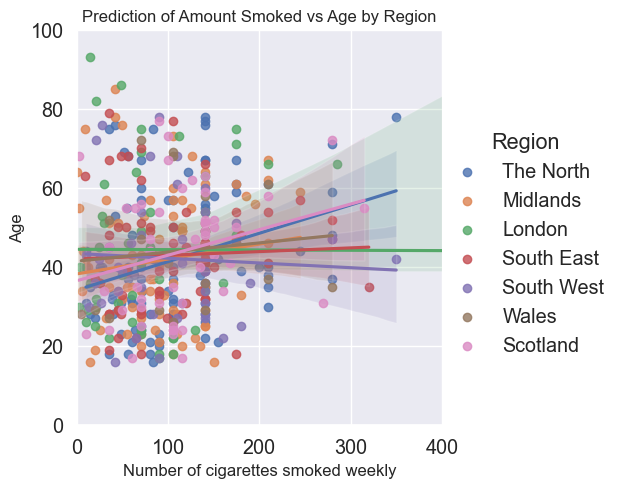

In [411]:
#Predicting amount smoked
endog = Objective_3_Hypothesis['Smoked Weekly']
exog = Objective_3_Hypothesis['Age']
model = sma.OLS (endog, sma.add_constant(exog))
result = model.fit()
region_mapping = {0: 'Midlands', 1: 'The North', 2: 'South East', 3: 'London', 4: 'South West', 5: 'Scotland', 6: 'Wales'}
Objective_3_Hypothesis['Region'] = Objective_3_Hypothesis['Region'].replace(region_mapping)
Region_Age_Scatter = pd.concat([Objective_3_Hypothesis['Smoked Weekly'], result.fittedvalues], axis = 1).set_axis(['Smoked Weekly', 'Age'], axis = 1)
sns.lmplot(Objective_3_Hypothesis, x = 'Smoked Weekly', y = 'Age', hue = 'Region')
plt.xlim(0,400)
plt.ylim(0,100)
plt.grid(True)
plt.title('Prediction of Amount Smoked vs Age by Region', fontsize=12)
plt.xlabel('Number of cigarettes smoked weekly', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()